In [159]:
import pandas as pd

In [160]:
data=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [161]:
data.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [162]:
data.drop(columns=['Unnamed: 32','id'],inplace=True)

In [163]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [164]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [165]:
X=data.drop(columns=['diagnosis']).values
y=data['diagnosis'].values

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [168]:
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [169]:
import keras
from tensorflow.keras import layers

In [170]:
model=keras.Sequential([layers.Dense(16,activation='relu'),layers.Dense(16,activation='relu'),layers.Dense(1,activation='sigmoid')])

In [171]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [172]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [173]:
x_val=X_train[:100]
partial_x_train=X_train[100:]
y_val=y_train[:100]
partial_y_train=y_train[100:]

In [174]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3859 - loss: 38.2612 - val_accuracy: 0.3200 - val_loss: 35.4102
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3859 - loss: 32.7415 - val_accuracy: 0.3200 - val_loss: 31.1633
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3859 - loss: 28.8102 - val_accuracy: 0.3200 - val_loss: 27.6292
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3859 - loss: 25.5332 - val_accuracy: 0.3200 - val_loss: 24.5003
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.3859 - loss: 22.6307 - val_accuracy: 0.3200 - val_loss: 21.6379
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3859 - loss: 19.9748 - val_accuracy: 0.3200 - val_loss: 18.9657
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3859 - loss: 17.4950 - val_accuracy: 0.3200 - val_loss: 16.4358
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3859 - loss: 15.1467 - val_accuracy: 0.3200 - val_

In [175]:
history_dict=history.history

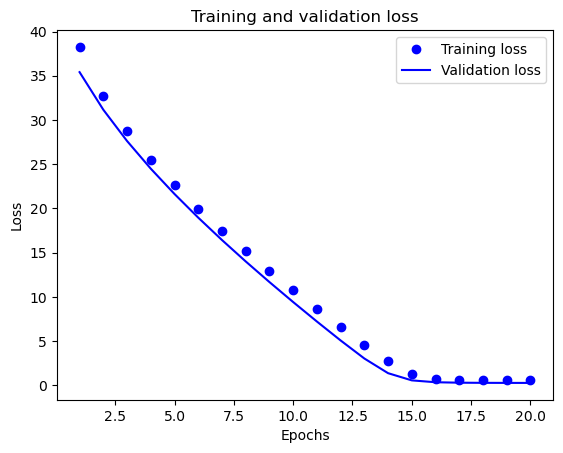

In [176]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

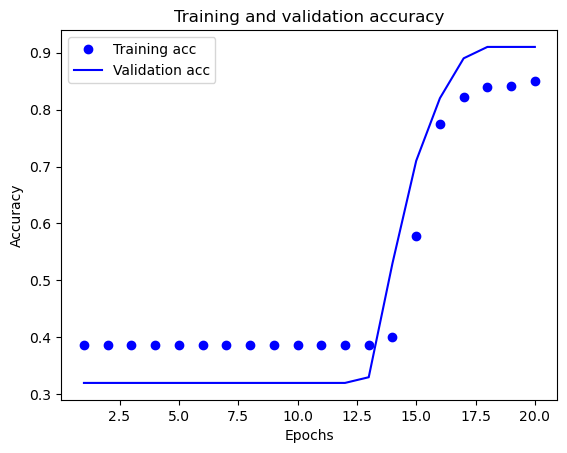

In [177]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [178]:
model1=keras.Sequential([layers.Dense(32,activation='relu'),layers.Dense(32,activation='relu'),layers.Dense(16),layers.Dense(1)])
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=10,batch_size=512)
results=model.evaluate(X_test,y_test)
results

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3714 - loss: 10.0209
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3714 - loss: 10.0209
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8999 - loss: 0.3313


[0.3008577525615692, 0.9035087823867798]

In [179]:
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.9732374 ],
       [1.        ],
       [0.99999917],
       [0.0071351 ],
       [0.02217387],
       [0.99999994],
       [1.        ],
       [0.9573977 ],
       [0.04526108],
       [0.10902819],
       [0.04746888],
       [0.99995744],
       [0.01025028],
       [0.05260212],
       [0.11725014],
       [0.00651729],
       [0.00556128],
       [0.024057  ],
       [0.21565475],
       [0.9999989 ],
       [0.9874048 ],
       [0.2546845 ],
       [1.        ],
       [0.11978668],
       [0.02075508],
       [0.00265996],
       [0.02161036],
       [0.01959386],
       [0.03892658],
       [1.        ],
       [0.03052953],
       [0.07339332],
       [0.30841184],
       [0.9468701 ],
       [0.07905173],
       [0.18151776],
       [0.999953  ],
       [0.21215512],
       [1.        ],
       [0.17011096],
       [0.07152643],
       [0.99989957],
       [0.03867576],
       [0.39276204],
       [0.00452912],
       [0.5133678 ],
       [0.18030865],
       [0.084